# COVID DATA ANALYSIS , PREDICTION & CLASSIFICATION CODE

# Name:- Ashwin Kumar | Aakash Loyar

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_mod = pd.read_csv('/home/ash/Downloads/covid-data.csv')
data_mod

#data preprocessing
# these are the column to extract
column_indices = [2,3,4]  # Columns to extract (e.g., 1 for Name, 3 for Occupation)
data = data_mod.iloc[:,column_indices]

In [34]:
India_data = data[data['location'] == "India"]
USA_data = data[data['location'] == "United States"]
Italy = data[data['location'] == "Italy"]
China = data[data['location'] == "China"]

India_data

,location,date,total_cases
156277,India,2020-01-05,NaN
156278,India,2020-01-06,NaN
156279,India,2020-01-07,NaN
156280,India,2020-01-08,NaN
156281,India,2020-01-09,NaN
...,...,...,...
157835,India,2024-04-11,NaN
157836,India,2024-04-12,NaN
157837,India,2024-04-13,NaN
157838,India,2024-04-14,NaN


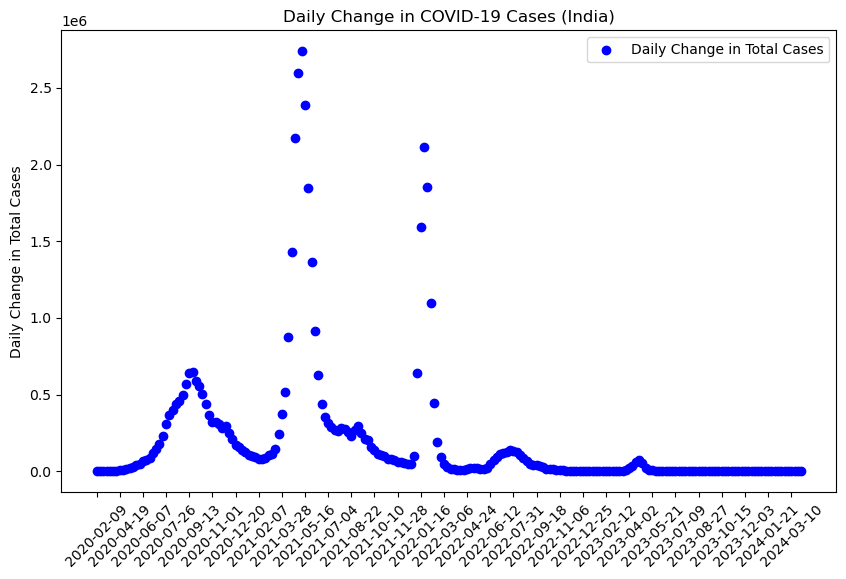

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming India_data is a DataFrame containing 'date' and 'total_cases' columns
date = India_data['date']
date1 = date.tolist()
total_cases = India_data['total_cases']
total_cases1 = total_cases.tolist()
# print(total_cases1)

daily_changes = [total_cases1[i+1] - total_cases1[i] for i in range(len(total_cases1)-1)]
del date1[0]

daily_changes= [0 if np.isnan(x) else x for x in daily_changes]


daily_changes_filtered = [dc for dc in daily_changes if dc >0]
date1_filtered = [date1[i] for i, dc in enumerate(daily_changes) if dc >0]

daily_changes = daily_changes_filtered
date1 = date1_filtered

plt.figure(figsize=(10, 6))
plt.scatter(date1, daily_changes, marker='o', linestyle='-', color='b', label='Daily Change in Total Cases')
plt.title('Daily Change in COVID-19 Cases (India)')
plt.ylabel('Daily Change in Total Cases')
plt.xticks(rotation=45)

# Choose a subset of dates to display on the x-axis (e.g., every nth date)
n = 7  # Display every nth date
plt.xticks(date1[::n], rotation=45)  # Display only every nth date on x-axis

plt.legend()
plt.show()

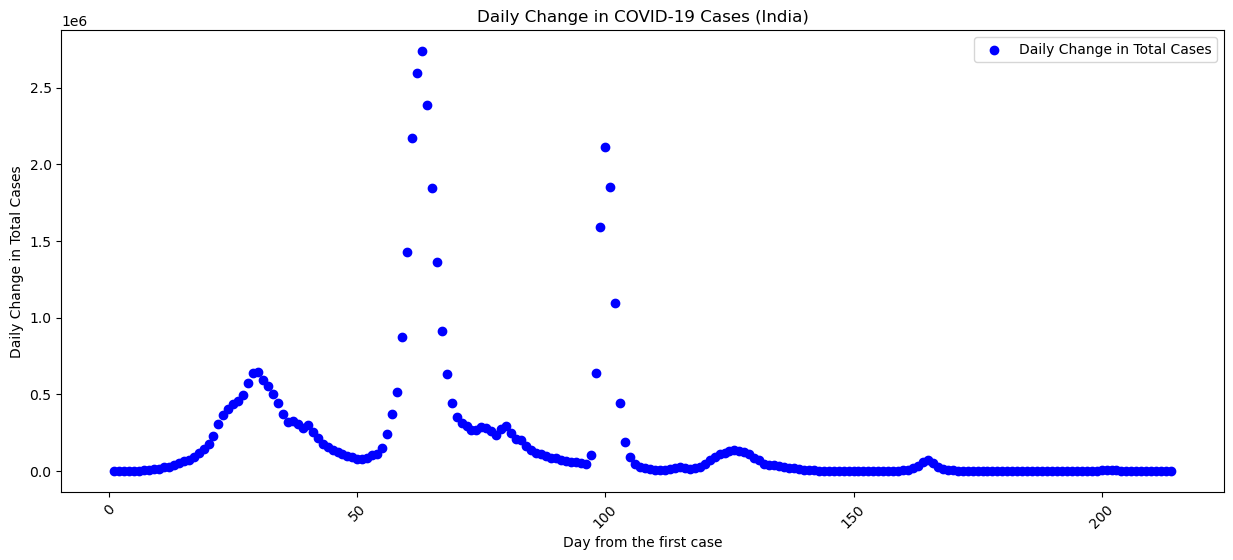

In [38]:
dayval=np.arange(1,215)
# print(dayval)
# print(daily_changes)
plt.figure(figsize=(15, 6))
plt.scatter(dayval, daily_changes, marker='o', linestyle='-', color='b', label='Daily Change in Total Cases')
plt.title('Daily Change in COVID-19 Cases (India)')
plt.ylabel('Daily Change in Total Cases')
plt.xlabel('Day from the first case')
plt.xticks(rotation=45)
plt.legend()
plt.show()


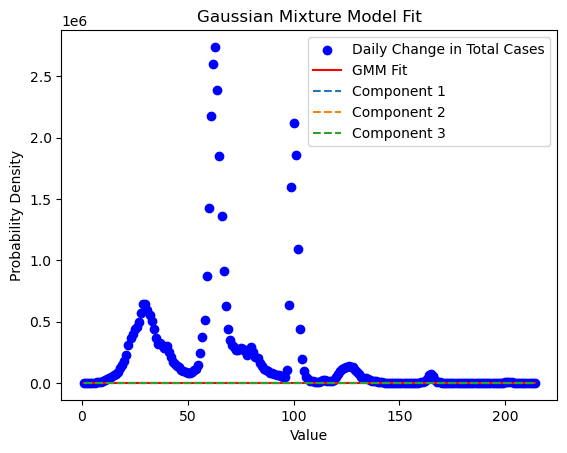

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Sample data (replace this with your own data)
values = dayval
frequencies = daily_changes

# Prepare the data
data = []
for value, freq in zip(values, frequencies):
    data.extend([value] * int(freq))  # Convert freq to integer
data = np.array(data).reshape(-1, 1)  # Reshape to a 2D array (n_samples, n_features)

# Fit Gaussian Mixture Model with 2 components
n_components = 3
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data)

# Plot histogram of the data
# plt.hist(data, bins=40, density=True, alpha=0.5, label='Data Histogram')
plt.scatter(dayval, daily_changes, marker='o', linestyle='-', color='b', label='Daily Change in Total Cases')
# Plot the Gaussian Mixture Model
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
log_probs = gmm.score_samples(x)  # Log probabilities
pdf = np.exp(log_probs)
plt.plot(x, pdf, color='red', label='GMM Fit')

# Plot individual Gaussian components
for i in range(n_components):
    mean = gmm.means_[i][0]
    cov = gmm.covariances_[i][0][0]
    weight = gmm.weights_[i]
    component_pdf = weight * np.exp(-(x - mean)**2 / (2 * cov)) / np.sqrt(2 * np.pi * cov)
    plt.plot(x, component_pdf, linestyle='--', label=f'Component {i+1}')

plt.title('Gaussian Mixture Model Fit')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


# Fitting gaussian mixture model with 3 components

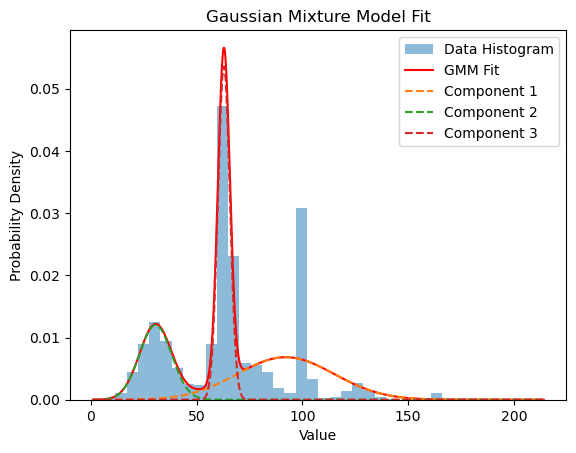

In [16]:
# Plot histogram of the data
plt.hist(data, bins=40, density=True, alpha=0.5, label='Data Histogram')

# Plot the Gaussian Mixture Model
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
log_probs = gmm.score_samples(x)  # Log probabilities
pdf = np.exp(log_probs)
plt.plot(x, pdf, color='red', label='GMM Fit')

# Plot individual Gaussian components
for i in range(n_components):
    mean = gmm.means_[i][0]
    cov = gmm.covariances_[i][0][0]
    weight = gmm.weights_[i]
    component_pdf = weight * np.exp(-(x - mean)**2 / (2 * cov)) / np.sqrt(2 * np.pi * cov)
    plt.plot(x, component_pdf, linestyle='--', label=f'Component {i+1}')

plt.title('Gaussian Mixture Model Fit')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Applying least squares approach classification 

Accuracy-1: 0.8975


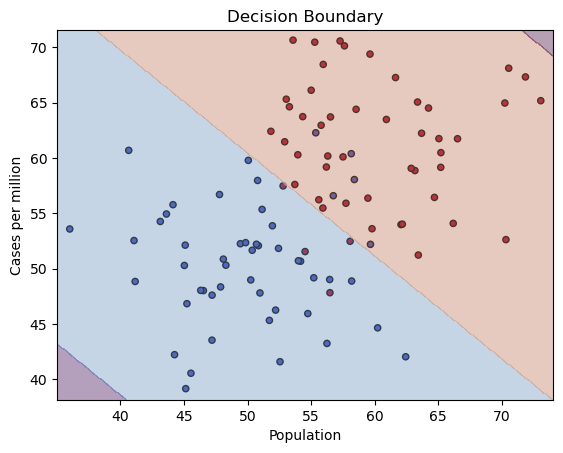

Accuracy-2: 0.665


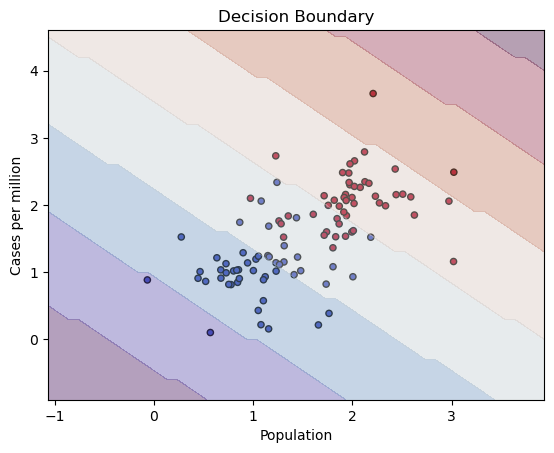

In [1]:

##### work done on synthetic data and can be extended to the above data ######3

import numpy as np
import matplotlib.pyplot as plt

#  Data generation

np.random.seed(0)
# Set the parameters of class distribution
mean1 = [50, 50]           # Mean of class1
mean2 = [60, 60]           # Mean of class2
cov = [[30, 0], [0, 30]]   # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))  # Class labels: 0 for class1, 1 for class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)   # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)   # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))  # Class labels: 0 for class1, 1 for class2


#  Find the decision boundary


def LS_Classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Testing labels
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add bias term
    w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train  # Compute the weight vector
    return np.round(X_test @ w), w

# Get the test data predictions
predictions, w = LS_Classify(tr_data, tr_targets, te_data)


# Evaluate the quality of decision boundary


def LS_Classify_Accuracy(Y_test, Y_pred):
    # Inputs: Ground truth test labels and predicted test labels
    # Outputs: Accuracy
    accuracy = np.sum(Y_test == Y_pred)
    # Compute the accuracy
    return accuracy / len(Y_test)

print("Accuracy-1:", LS_Classify_Accuracy(te_targets, predictions))


#  Visualize the decision boundary


def plot_decision_boundary(X, y, w):
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], w)
    Z = np.round(Z)
    Z = Z.reshape(xx.shape)
    # Plotting with a different background
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='twilight_shifted')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Population')
    plt.ylabel('Cases per million')
    plt.title('Decision Boundary')
    plt.show()

X_train_augmented = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))  # Augment training data with bias term
w = np.linalg.pinv(X_train_augmented) @ tr_targets
plot_decision_boundary(tr_data, tr_targets, w)


#  Change the target label notation, and repeat the experiments
tr_targets = 2 * tr_targets - 1
te_targets = 2 * te_targets - 1

#  Repeat the experiments with Laplacian distribution
loc1 = [1, 1]
loc2 = [2, 2]
scale = 0.3

class1_tr = np.random.laplace(loc=loc1, scale=0.3, size=(50, 2))
class2_tr = np.random.laplace(loc=loc2, scale=0.3, size=(50, 2))
tr_data = np.concatenate((class1_tr, class2_tr))
tr_targets = np.concatenate((np.full(50, -1), np.full(50, 1)))

class1_te = np.random.laplace(loc=loc1, scale=0.3, size=(200, 2))
class2_te = np.random.laplace(loc=loc2, scale=0.3, size=(200, 2))
te_data = np.concatenate((class1_te, class2_te))
te_targets = np.concatenate((np.full(200, -1), np.full(200, 1)))

predictions, w = LS_Classify(tr_data, tr_targets, te_data)
X_train_augmented = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))
w = np.linalg.pinv(X_train_augmented) @ tr_targets

print("Accuracy-2:", LS_Classify_Accuracy(te_targets, predictions))
plot_decision_boundary(tr_data, tr_targets, w)


# Implementation of Expectation and Maximization 

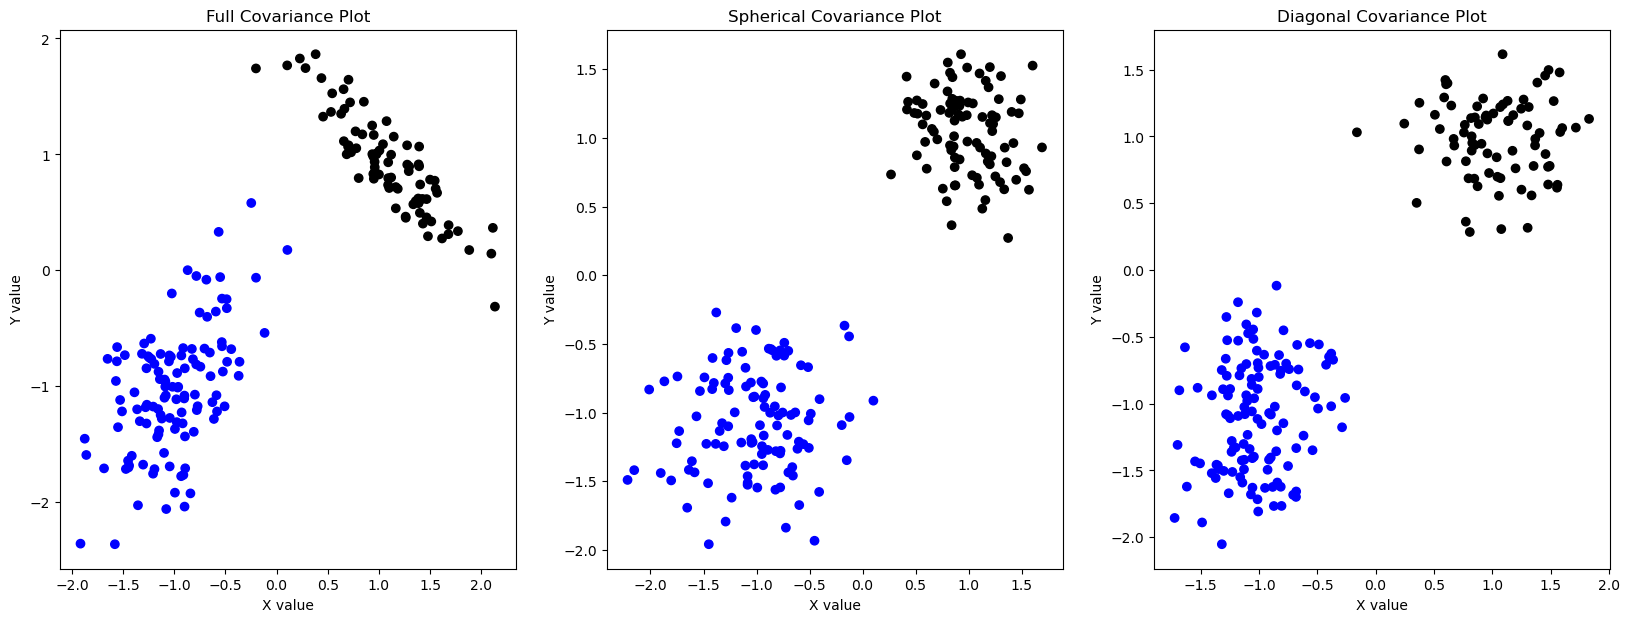

In [2]:
# importing the library
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math


def generateData(pi, mu, sigma, N):
    data = []
    labels = []

    for _ in range(N):
        selected_gaussian = random.choices(range(len(pi)), weights=pi)[0]
        sample = np.random.multivariate_normal(mu[selected_gaussian], sigma[selected_gaussian])

        # Append the sampled data point and its label
        data.append(sample)
        labels.append(selected_gaussian)

    # Convert lists to arrays
    data = np.asarray(data)
    labels = np.asarray(labels)

    return data, labels


mu1 =np.array([-1,-1])                     #Mean vector of component1 in GMM
sig1 =np.array([[0.15,0.1],[0.1,0.25]])    #Full covariance matrix of component1 in GMM
mu2 =np.array([1,1])                       #Mean vector of component2 in GMM
sig2 =np.array([[0.3,-0.25],[-0.25,0.25]]) #Full covariance matrix of component2 in GMM
pi =np.array([0.6,0.4])                    #Prior probabilities

n_points =1000  #Number of points

# Spherical covariances
sig1_s =np.array([[0.2,0],[0,0.2]])
sig2_s =np.array([[0.1,0],[0,0.1]])
# Diagonal covariances
sig1_d =np.array([[0.1,0],[0,0.2]])
sig2_d =np.array([[0.2,0],[0,0.1]])

# ************************* Creating the synthetic data set to plot  ***************************

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], 200)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], 200)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], 200)

# ************************* Plotting the synthetic data set to plot  ***************************

fig, ax = plt.subplots(1,3, figsize=(20,7))

# Visualize the data sampled from the GMM with full covariance matrix
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, cmap=ListedColormap(['blue', 'black']))
ax[0].set_title('Full Covariance Plot')
ax[0].set_xlabel("X value")
ax[0].set_ylabel("Y value")

# Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c=labels_sp, cmap=ListedColormap(['blue', 'black']))
ax[1].set_title('Spherical Covariance Plot')
ax[1].set_xlabel("X value")
ax[1].set_ylabel("Y value")

# Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c=labels_dg, cmap=ListedColormap(['blue', 'black']))
ax[2].set_title('Diagonal Covariance Plot')
ax[2].set_xlabel("X value")
ax[2].set_ylabel("Y value")

plt.show()


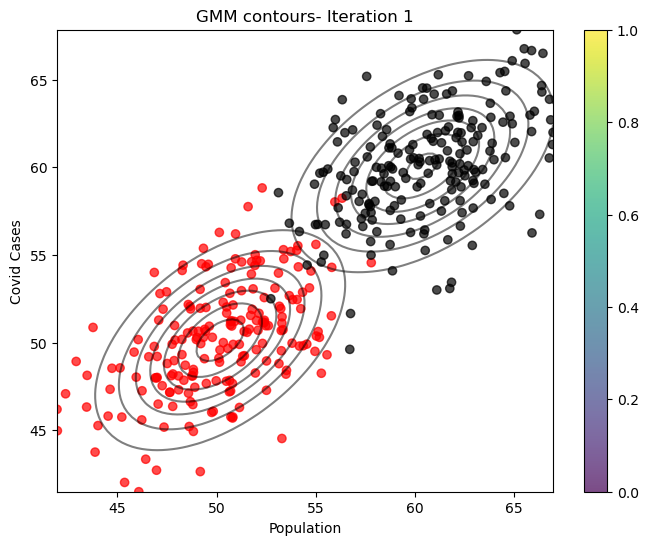

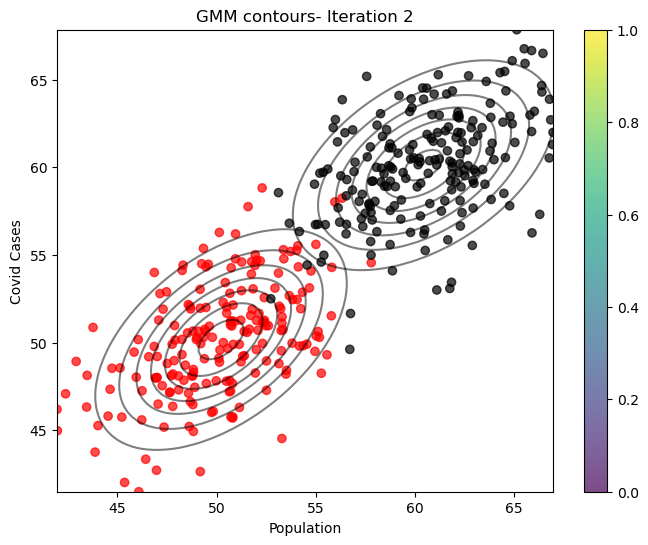

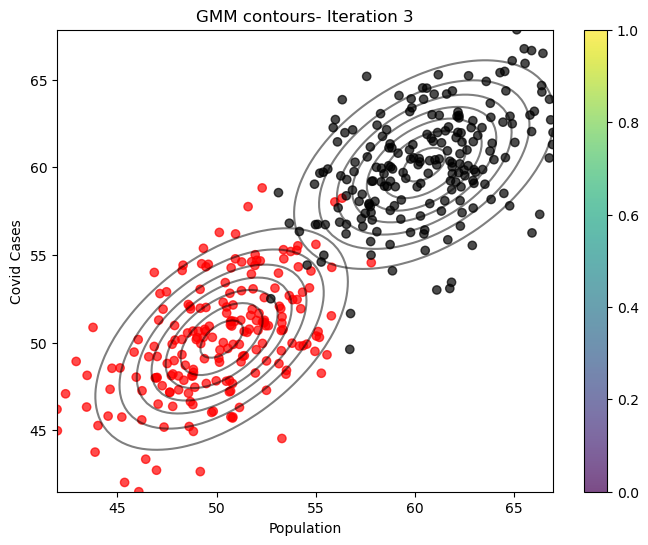

In [26]:
# All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

# Implementing expectation minimization algorithm on the data

def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    # Inputs: data, parameters of GMM model
    # Outputs: likelihood
    likelihoods = np.zeros((len(data), len(pi)))
    for k in range(len(pi)):
        likelihoods[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])
    likelihood = np.sum(likelihoods, axis=1)
    if log_likelihood:
        return np.sum(np.log(likelihood))
    if likelihoods:
        return likelihoods
    return likelihood

# Writing the steps for the expectation
def expectation(data, pi, mu, sigma):
    # Inputs: data, parameters of GMM model
    # Outputs: gamma
    gamma = np.zeros((len(data), len(pi)))
    for n in range(len(data)):
        # Iterate through the data points
        for k in range(len(pi)):
            # Iterate through the components in GMM
            numerator = pi[k] * multivariate_normal.pdf(data[n], mean=mu[k], cov=sigma[k])
            denominator = np.sum([pi[j] * multivariate_normal.pdf(data[n], mean=mu[j], cov=sigma[j]) for j in range(len(pi))])
            gamma[n, k] = numerator / denominator
            gamma[n, k] = numerator / denominator
    return gamma

# This is the function for maximization step
def maximization(data, gamma):
    # Inputs: data, gamma
    # Outputs: Updated parameters of GMM model
    # Maximization step
    Nk = np.sum(gamma, axis=0)
    pi = Nk / len(data)
    mu = np.dot(gamma.T, data) / Nk[:, None]
    sigma = np.zeros((len(pi), data.shape[1], data.shape[1]))
    for k in range(len(pi)):
        diff = data - mu[k]
        sigma[k] = np.dot(gamma[:, k] * diff.T, diff) / Nk[k]
    return pi, mu, sigma
    # Return the parameters of GMM model

# Plot contours and data points on separate graphs
def plot_contours(data, labels, pi, mu, sigma, title):
    plt.figure(figsize=(8, 6))
    x, y = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 100),
                       np.linspace(data[:, 1].min(), data[:, 1].max(), 100))
    positions = np.vstack([x.ravel(), y.ravel()]).T
    for k in range(len(pi)):
        z = multivariate_normal(mean=mu[k], cov=sigma[k]).pdf(positions)
        z = z.reshape(x.shape)
        plt.contour(x, y, z, alpha=0.5, colors='black')  # Change contour color to black
    plt.scatter(data[:, 0], data[:, 1], c=['red' if label == 0 else 'black' for label in labels], alpha=0.7)  # Change point colors to red and black
    plt.title(title)
    plt.xlabel('Population')
    plt.ylabel('Covid Cases')
    plt.colorbar()

# Create synthetic data
np.random.seed(0)
mean1 = np.array([50, 50])
mean2 = np.array([60, 60])
cov1 = np.array([[10, 5], [5, 10]])
cov2 = np.array([[10, 5], [5, 10]])
data1 = np.random.multivariate_normal(mean1, cov1, 200)
data2 = np.random.multivariate_normal(mean2, cov2, 200)
data = np.vstack([data1, data2])
labels = np.hstack([np.zeros(len(data1)), np.ones(len(data2))])


# Initializing the parameter values
pi = np.array([0.5, 0.5])
mu = np.array([mean1, mean2]) # initializing the mean values
sigma = np.array([cov1, cov2])   # Initialize the covariance matrices

nsteps = 3   # Number of steps to run EM algorithm
for index in range(0, nsteps, 1):
    # Compute the likelihood
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

    # Expectation step
    gamma = expectation(data, pi, mu, sigma)

    # Maximization step
    pi, mu, sigma = maximization(data, gamma)

    # Plot the contours and data points
    plot_contours(data, labels, pi, mu, sigma, title=f'GMM contours- Iteration {index+1}')

    plt.show()

